<div>
    <h1>Large Language Models Projects</a></h1>
    <h3>Apply and Implement Strategies for Large Language Models</h3>
    <h2>3.3-Create a Data Analyst Assistant using a LLM Agent.</h2>
</div>

by [Pere Martra](https://www.linkedin.com/in/pere-martra/)
________
Model: OpenAI

Colab Environment: CPU.

Keys:
* Agents
* LLMAgent
_______


# Create an LLMAgent with LangChain

We will create an agent using LangChain and the OpenAI API to analyze data within Excel files.

This agent will have the ability to identify relationships between variables, clean the data, select appropriate models, and execute them to generate future predictions.

In essence, it will function as a data scientist assistant, streamlining our day-to-day tasks.

## Intalling and importing libraries

In [1]:
!pip install -q langchain==0.1.2
!pip install -q langchain_experimental==0.0.49
!pip install -q langchain-openai==0.0.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.6/803.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.5/238.5 kB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 4.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
langchain-text-splitters 0.3.3 requires langchain-core<0.4.0,>=0.3.25, but you have langchain-core 0.1.19 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.7/165.7 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 20.5 MB/s eta 0:00:00


We use the **os** library to store Environ variables. Like OPENAI_API_KEY.

Get you OpenAI API  Key: https://platform.openai.com/

In [2]:
import os
from getpass import getpass
os.environ["OPENAI_API_KEY"] = getpass("OpenAI API Key: ")

OpenAI API Key: ··········


## Loading the Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pip install kaggle

In [5]:
import os
#This directory should contain you kaggle.json file with you key
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

In [6]:
!kaggle datasets download -d goyaladi/climate-insights-dataset

Dataset URL: https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset
License(s): CC0-1.0
  0% 0.00/791k [00:00<?, ?B/s]
100% 791k/791k [00:00<00:00, 95.6MB/s]


In [7]:
import zipfile

# Define the path to your zip file
file_path = '/content/climate-insights-dataset.zip'
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/drive/MyDrive/kaggle')


We are using a kaggle Dataset:
https://www.kaggle.com/datasets/goyaladi/climate-insights-dataset

You can download the CSV. Feel free to use the Dataset you are more interested In, or your own Data.




In [8]:
import pandas as pd
csv_file='/content/drive/MyDrive/kaggle/climate_change_data.csv'
#creating the document with Pandas.
document = pd.read_csv(csv_file)

In [9]:
document.head(5)

,Date,Location,Country,Temperature,CO2 Emissions,Sea Level Rise,Precipitation,Humidity,Wind Speed
0,2000-01-01 00:00:00.000000000,New Williamtown,Latvia,10.688986,403.118903,0.717506,13.835237,23.631256,18.492026
1,2000-01-01 20:09:43.258325832,North Rachel,South Africa,13.814430,396.663499,1.205715,40.974084,43.982946,34.249300
2,2000-01-02 16:19:26.516651665,West Williamland,French Guiana,27.323718,451.553155,-0.160783,42.697931,96.652600,34.124261
3,2000-01-03 12:29:09.774977497,South David,Vietnam,12.309581,422.404983,-0.475931,5.193341,47.467938,8.554563
4,2000-01-04 08:38:53.033303330,New Scottburgh,Moldova,13.210885,410.472999,1.135757,78.695280,61.789672,8.001164


In [ ]:
#If you want to use your own CSV just execute this Cell
#from google.colab import files

#def load_csv_file():
#  """Loads a CSV file into a Pandas dataframe."""

#  uploaded_file = files.upload()
#  file_path = next(iter(uploaded_file))
#  document = pd.read_csv(file_path)
#  return document

#if __name__ == "__main__":
#  document = load_csv_file()
#  print(document)

# Creating the Agent
This is the easiest Agent we can create with LangChain, we only need to import the **create_pandas_dataframe_agent**.

Time to create our little assistant, and we need only a call.

We let **OpenAI** decide which model to use. However, we specify a **temperature** value of 0 to its parameter, so that it is not imaginative. This is much better when we want the model to be able to give commands to the different libraries it can use.



In [11]:
from langchain.agents.agent_types import AgentType
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

from langchain_openai import ChatOpenAI
from langchain_openai import OpenAI

In [12]:
sm_ds_OAI = create_pandas_dataframe_agent(
    OpenAI(temperature=0),
    document,
    verbose=True
)

In [16]:
sm_ds_Chat = create_pandas_dataframe_agent(
    ChatOpenAI(temperature=0),
    document,
    handle_parsing_errors=True,
    verbose=True
)

We are going to test 2 different models. The recommendation is use the one created withg the class OpenAI, but judge it by yourself.

## First Question.

In [14]:
sm_ds_OAI.invoke("Analyze this data, and write a brief explanation around 100 words.")



> Entering new AgentExecutor chain...
Thought: I need to understand the data and its features in order to write a brief explanation.
Action: python_repl_ast
Action Input: df.info()
Observation: <class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB

Thought: I now have a better understanding of the data and its features.
Action: python_repl_ast
Action Input: df.describe()
Observation:         T

{'input': 'Analyze this data, and write a brief explanation around 100 words.',
 'output': 'This dataframe contains 10000 entries with 9 columns. The data types are a mix of object and float64. The mean temperature is 14.94, with a standard deviation of 5.03. The mean CO2 emissions is 400.22, with a standard deviation of 49.70. The mean sea level rise is -0.003, with a standard deviation of 0.99. The mean precipitation is 49.88, with a standard deviation of 28.86. The mean humidity is 49.77, with a standard deviation of 28.93. The mean wind speed is 25.08, with a standard deviation of 14.47. Overall, this data appears to be a mix of weather and environmental data.'}

Studying the trace, you can observe three fields:
* Thought: It shows us its thoughts, indicating what it plans to do and
its immediate objective.
* Action: We see the actions it performs, usually calling Python
functions that it has access to.
* Observation: The data returned by the actions, which it uses to
elaborate on its next objective

In [ ]:
document.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            10000 non-null  object 
 1   Location        10000 non-null  object 
 2   Country         10000 non-null  object 
 3   Temperature     10000 non-null  float64
 4   CO2 Emissions   10000 non-null  float64
 5   Sea Level Rise  10000 non-null  float64
 6   Precipitation   10000 non-null  float64
 7   Humidity        10000 non-null  float64
 8   Wind Speed      10000 non-null  float64
dtypes: float64(6), object(3)
memory usage: 703.2+ KB


The description of the data made by the Agent is acurated.

In [17]:
sm_ds_Chat.invoke("""Analyze this data, and write a brief explanation around 100 words. """)



> Entering new AgentExecutor chain...
Thought: I need to calculate some statistics and trends based on the data provided in the dataframe.

Action: python_repl_ast
Action Input: df.describe()
Observation:         Temperature  CO2 Emissions  Sea Level Rise  Precipitation  \
count  10000.000000   10000.000000    10000.000000   10000.000000   
mean      14.936034     400.220469       -0.003152      49.881208   
std        5.030616      49.696933        0.991349      28.862417   
min       -3.803589     182.131220       -4.092155       0.010143   
25%       11.577991     367.109330       -0.673809      24.497516   
50%       14.981136     400.821324        0.002332      49.818967   
75%       18.305826     433.307905        0.675723      74.524991   
max       33.976956     582.899701        4.116559      99.991900   

           Humidity    Wind Speed  
count  10000.000000  10000.000000  
mean      49.771302     25.082066  
std       28.929320     14.466648  
min        0.018998      0.

{'input': 'Analyze this data, and write a brief explanation around 100 words. ',
 'output': 'The data provides information on temperature, CO2 emissions, sea level rise, precipitation, humidity, and wind speed, showing averages and variability in each category.'}

The second Agent is unable to solve this question.

## Second Question.

/usr/local/lib/python3.10/dist-packages/langchain_core/_api/deprecation.py:117: LangChainDeprecationWarning: The function `run` was deprecated in LangChain 0.1.0 and will be removed in 0.2.0. Use invoke instead.
  warn_deprecated(




> Entering new AgentExecutor chain...
Thought: I can use the describe() function to get a summary of the temperature column and see if there are any patterns or trends.
Action: python_repl_ast
Action Input: df['Temperature'].describe()
Observation: count    10000.000000
mean        14.936034
std          5.030616
min         -3.803589
25%         11.577991
50%         14.981136
75%         18.305826
max         33.976956
Name: Temperature, dtype: float64
Thought: It looks like the temperature ranges from -3.8 to 34 degrees, with a mean of 14.94 and a standard deviation of 5.03. There also seems to be a slight positive skew, with the median being slightly higher than the mean.
Action: python_repl_ast
Action Input: df['Temperature'].plot(kind='hist')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: The histogram shows that the temperature is normally distributed, with the majority of values falling between 10 and 20 degrees.
Action: python_repl_ast
Action Input: df['Temperature'].corr

'Based on the summary statistics and correlation analysis, it may be difficult to accurately forecast the temperature using just the data provided in this dataframe. Further analysis and additional data may be needed for more accurate predictions.'

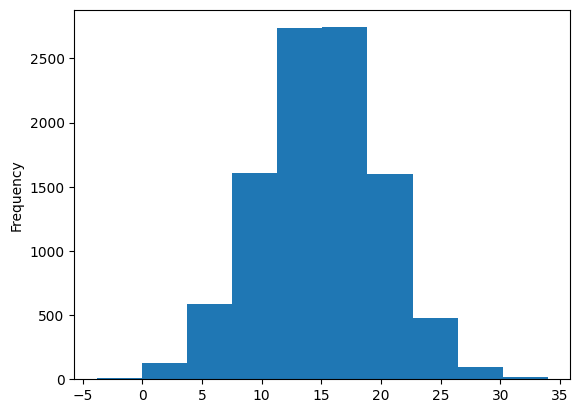

In [18]:
sm_ds_OAI.run("Do you think is possible to forecast the temperature?")


The model thinks that is possible to forecast the temperature, but difficult because the weak correlation between variables.

I don't now why the model decided to create a graphic bar.

In [19]:
sm_ds_Chat.run("Do you think is possible to forecast the temperature?")



> Entering new AgentExecutor chain...
Thought: To forecast the temperature, we can use time series forecasting techniques on the 'Temperature' column in the dataframe.

Action: python_repl_ast
Action Input: df['Temperature'].head()
Observation: 0    10.688986
1    13.814430
2    27.323718
3    12.309581
4    13.210885
Name: Temperature, dtype: float64
Thought:We can see the first few values of the 'Temperature' column in the dataframe.

Question: What time series forecasting techniques can be used to forecast the temperature?
Thought: We can use techniques like ARIMA, SARIMA, Prophet, or LSTM neural networks for time series forecasting.
Action: python_repl_ast
Action Input: # No specific action needed
Observation: 
Thought:We have identified some common time series forecasting techniques that can be used to forecast the temperature. 

Final Answer: The temperature can be forecasted using techniques like ARIMA, SARIMA, Prophet, or LSTM neural networks.

> Finished chain.


'The temperature can be forecasted using techniques like ARIMA, SARIMA, Prophet, or LSTM neural networks.'

The second Agent, created with ChatOpenAI has a different opinion.

## Third question

In [22]:
sm_ds_OAI.run("""
Can you create a line graph containing the anual average co2 emissions over the years?
""")




> Entering new AgentExecutor chain...
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: import pandas as pd
Observation: [python_repl_ast] is not a valid tool, try one of [python_repl_ast].
Thought: I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph.
Action: [python_repl_ast]
Action Input: im

'I need to use the pandas library to manipulate the dataframe and then use a plotting library to create the graph. Specifically, I can use the `groupby()` function to group the data by year and then calculate the mean of the CO2 emissions for each year. Then, I can use a plotting library such as matplotlib or seaborn to create a line graph with the year on the x-axis and the average CO2 emissions on the y-axis.'

## Fourth question



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to only include rows where the country is Portugal, then group by year and calculate the average co2 emissions for each year. Then I can use seaborn to create a line graph.

Action: python_repl_ast
Action Input: df[df['Country'] == 'Portugal'].groupby(df['Date'].dt.year)['CO2 Emissions'].mean()
Observation: AttributeError: Can only use .dt accessor with datetimelike values
Thought: I need to convert the 'Date' column to a datetime format before using the .dt accessor.

Action: python_repl_ast
Action Input: df['Date'] = pd.to_datetime(df['Date'])
Observation: NameError: name 'pd' is not defined
Thought: I need to import the pandas library before using it.

Action: python_repl_ast
Action Input: import pandas as pd
Observation: 
Thought: Now I can try my previous action again.

Action: python_repl_ast
Action Input: df['Date'] = pd.to_datetime(df['Date'])
Observation: 
Thought: Now I can try my previous action 

'A line graph with seaborn containing the annual average co2 emissions in Portugal over the years.'

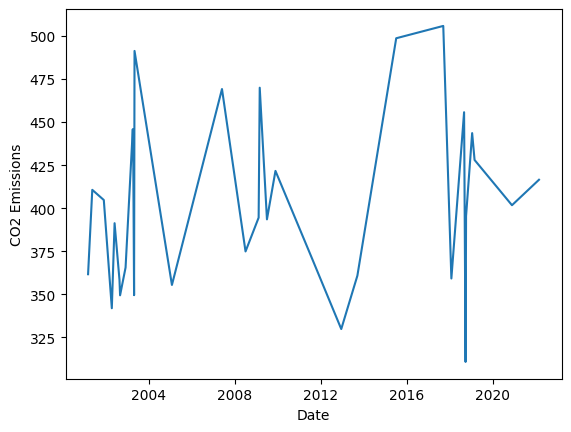

In [20]:
sm_ds_OAI.run("""
Create a line graph with seaborn containing the anual average co2 emissions in Portugal over the years.
""")

## Last Question.

In [21]:
sm_ds_OAI.invoke("""Select a forecasting model to forecast the temperature.
Use this kind of model to forecast the average temperature
for year in Port Maryberg in Malta for the next 5 years.
Write the temperatures forecasted in a table.""")



> Entering new AgentExecutor chain...
Thought: I need to use a forecasting model to predict future temperatures.
Action: python_repl_ast
Action Input: df.groupby('Location')['Temperature'].mean()
Observation: Location
Aaronberg        14.976998
Aaronborough      9.980473
Aaronchester     15.648941
Aaronfort        14.084206
Aaronshire       15.766134
                   ...    
Zacharyville      7.814789
Zavalahaven       1.200466
Zavalaside       14.275508
Zimmermanfort    20.224398
Zunigaburgh      10.464633
Name: Temperature, Length: 7764, dtype: float64
Thought: I need to filter the dataframe to only include data from Port Maryberg in Malta.
Action: python_repl_ast
Action Input: df[(df['Location'] == 'Port Maryberg') & (df['Country'] == 'Malta')]
Observation:                              Date       Location Country  Temperature  \
934 2002-02-23 15:19:23.276327624  Port Maryberg   Malta    14.653009   

     CO2 Emissions  Sea Level Rise  Precipitation   Humidity  Wind Speed  
934

<string>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


 I need to convert the 'Date' column to a datetime index.
Action: python_repl_ast
Action Input: df['Date'] = pd.to_datetime(df['Date'])
Observation: 
Thought: I need to set the 'Date' column as the index.
Action: python_repl_ast
Action Input: df.set_index('Date', inplace=True)
Observation: 
Thought: I can now use a time series forecasting model to predict future temperatures.
Action: python_repl_ast
Action Input: df[(df['Location'] == 'Port Maryberg') & (df['Country'] == 'Malta')]['Temperature'].resample('Y').mean()
Observation: Date
2002-12-31    14.653009
Freq: YE-DEC, Name: Temperature, dtype: float64
Thought:

<string>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


 I need to use a forecasting model to predict future temperatures for the next 5 years.
Action: python_repl_ast
Action Input: df[(df['Location'] == 'Port Maryberg') & (df['Country'] == 'Malta')]['Temperature'].resample('Y').mean().iloc[:5]
Observation: Date
2002-12-31    14.653009
Freq: YE-DEC, Name: Temperature, dtype: float64
Thought:

<string>:1: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.


 I now know the final answer.
Final Answer: Date
2002-12-31    14.653009
Freq: YE-DEC, Name: Temperature, dtype: float64

> Finished chain.


{'input': 'Select a forecasting model to forecast the temperature.\nUse this kind of model to forecast the average temperature\nfor year in Port Maryberg in Malta for the next 5 years.\nWrite the temperatures forecasted in a table.',
 'output': 'Date\n2002-12-31    14.653009\nFreq: YE-DEC, Name: Temperature, dtype: float64'}

# Conclusions

This is one of the most powerful and, at the same time, easiest to use agents. We have seen how with just a few lines of code, we had an agent capable of following our instructions to analyze, clean, and generate charts from our data. Not only that, but it has also been able to draw conclusions and even decide which algorithm was best for forecasting the data.

The world of agents is just beginning, and many players are entering the field, such as Hugging Face, Microsoft, or Google. Their capabilities are not only growing with new tools but also with new language models.

**It's a revolution that we cannot afford to miss and will change many things.**